In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.image as mpimg

In [2]:
!curl -L -o archive.zip https://www.kaggle.com/api/v1/datasets/download/subho117/cat-and-dog-classification-using-cnn

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  544M  100  544M    0     0  75.4M      0  0:00:07  0:00:07 --:--:-- 78.9M


In [3]:
from zipfile import ZipFile

data_path = 'archive.zip'

with ZipFile(data_path, 'r') as zip:
    zip.extractall()
    print('The data set has been extracted.')

The data set has been extracted.


In [4]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

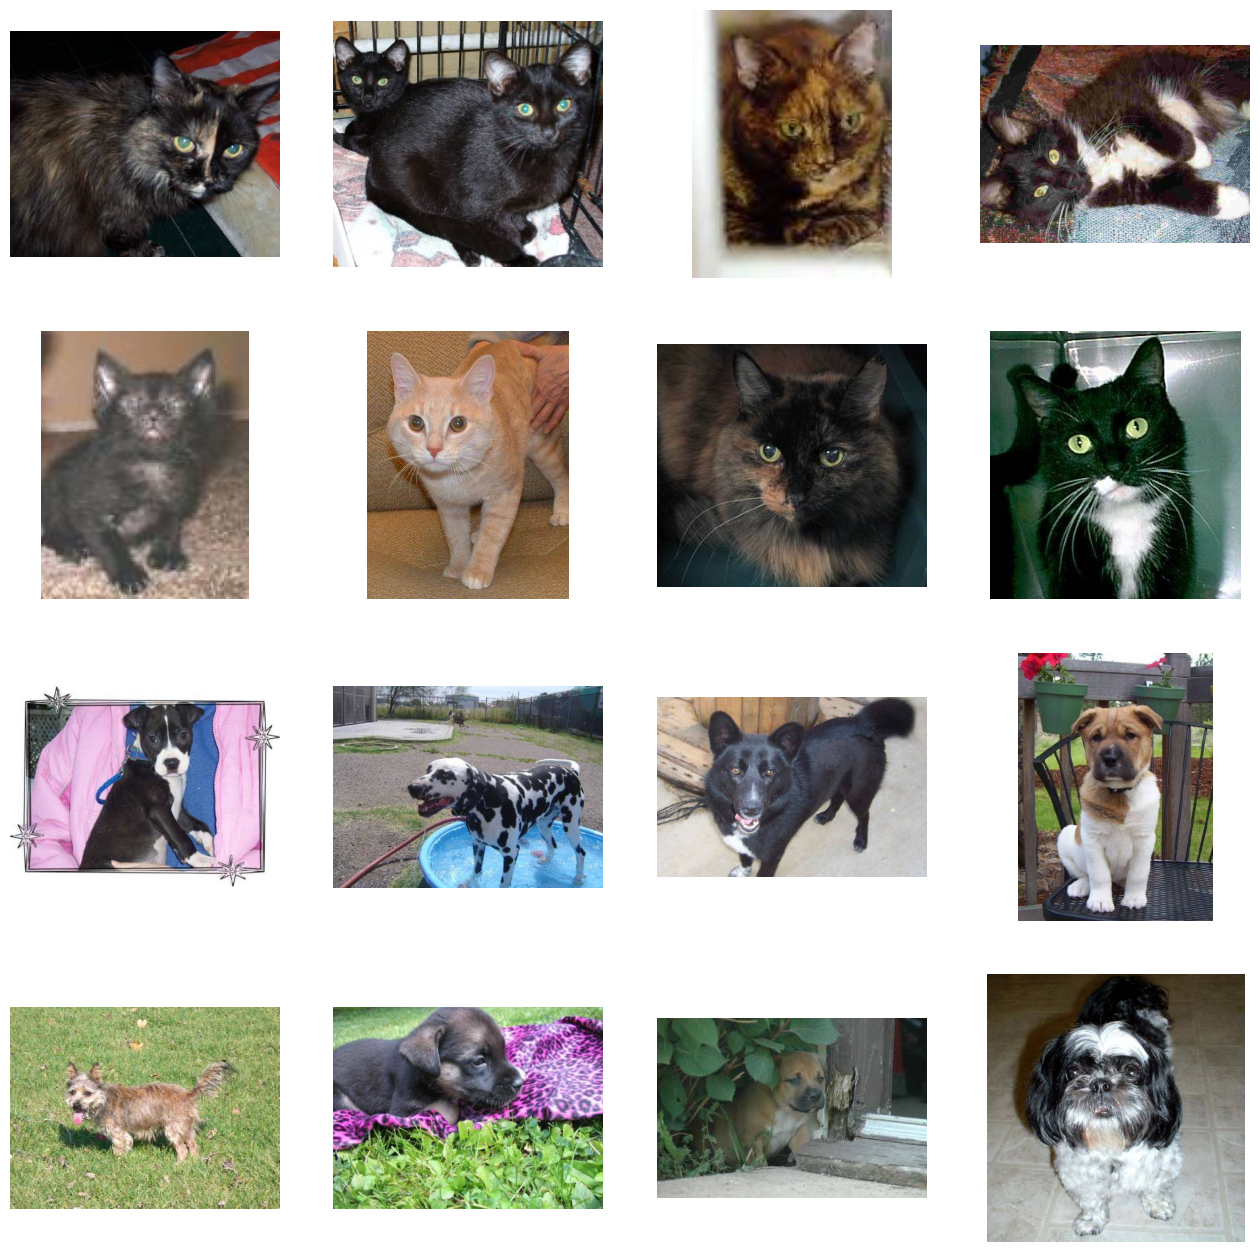

In [5]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

cat_dir = os.path.join('dog-vs-cat/cat')
dog_dir = os.path.join('dog-vs-cat/dog')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210

cat_images = [os.path.join(cat_dir, fname) for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname) for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
	sp = plt.subplot(4, 4, i+1)
	sp.axis('Off')

	img = mpimg.imread(img_path)
	plt.imshow(img)

plt.show()

In [6]:
base_dir = 'dog-vs-cat'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir, image_size=(200, 200), subset='training', seed=1, validation_split=0.1, batch_size=32)
test_datagen = image_dataset_from_directory(base_dir, image_size=(200, 200), subset='validation', seed=1, validation_split=0.1, batch_size=32)

Found 25000 files belonging to 2 classes.
Using 22500 files for training.
Found 25000 files belonging to 2 classes.
Using 2500 files for validation.


In [7]:
model = tf.keras.models.Sequential([
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),

	layers.Flatten(),
	layers.Dense(512, activation='relu'),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.1),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(
	loss='binary_crossentropy',
	optimizer='adam',
	metrics=['accuracy']
)

In [21]:
history = model.fit(train_datagen, epochs=5, validation_data=test_datagen)

Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 36s 51ms/step - accuracy: 0.8127 - loss: 0.4099 - val_accuracy: 0.7020 - val_loss: 0.8591
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 38s 47ms/step - accuracy: 0.8589 - loss: 0.3231 - val_accuracy: 0.5176 - val_loss: 1.9069
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 44s 51ms/step - accuracy: 0.7951 - loss: 0.4323 - val_accuracy: 0.7616 - val_loss: 0.6018
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.8740 - loss: 0.2909 - val_accuracy: 0.6220 - val_loss: 0.6739
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.7634 - loss: 0.4877 - val_accuracy: 0.8136 - val_loss: 0.9746


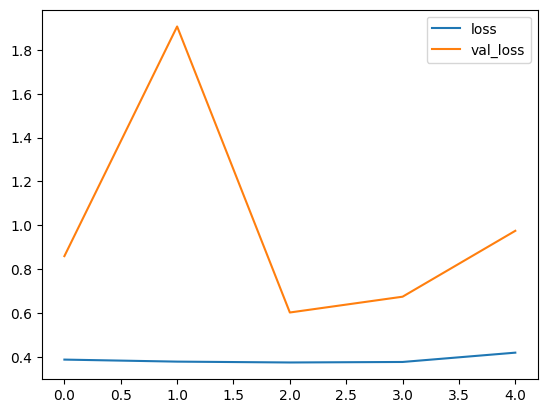

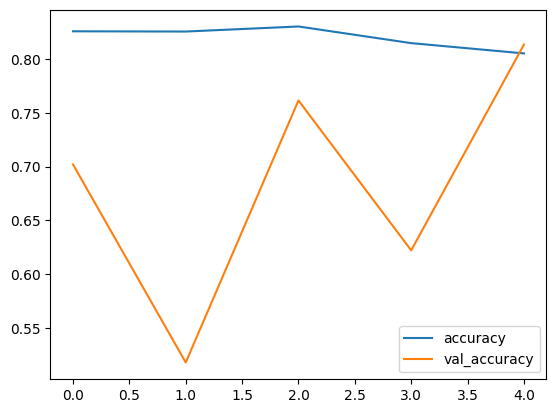

In [22]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

In [28]:
from keras.preprocessing import image


def predict(path):
    test_image = image.load_img(path, target_size=(200,200))
    plt.imshow(test_image)
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image,axis=0)

    result = model.predict(test_image)
    kls = 'Dog' if result >= .5 else 'Cat'
    plt.title(kls)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


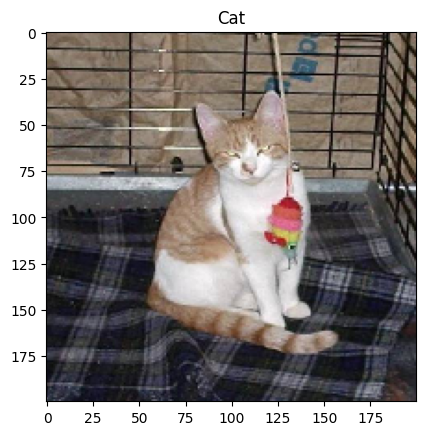

In [29]:
predict('/content/dog-vs-cat/cat/cat.288.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


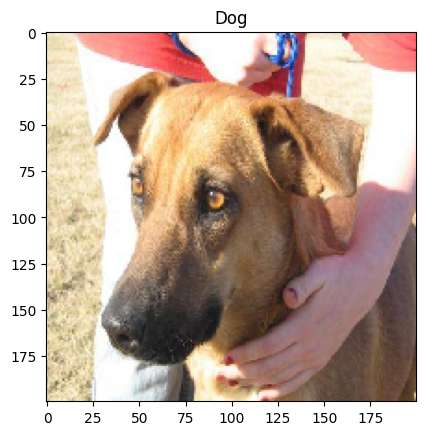

In [30]:
predict('/content/dog-vs-cat/dog/dog.123.jpg')